# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Data Science Course/Food Hub/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations: The Data Frame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer, showing their customer id, the cuisine type, whether they ordered on the weekend or weekday, how long the food took to prepare and deliver, as well as the cost of the order, restaurant name, and a rating provided by the customer, if given.

### **Question 1:** How many rows and columns are present in the data?

> Indented block



In [ ]:
# Write your code here
print(df.shape)

(1898, 9)


#### Observations: My data set has 1898 rows and 9 columns. This means for every row of data, there are 9 different variables. This also signifies that we are examining 1898 different orders placed through Food Hub.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: Based on the output of the info() function, I now know that four of my columns are type int64. This means four of my columns hold integer values, such as order ID, Customer ID and the time it took to prepare the food. The one column with a data type float64 is cost_of_the_order, these are numbers with decimal places, and tells us the cost of the order. The remaining columns are the object type, these are names of restaurants, type of cuisine, day of the week, and rating, which in some cases was not given.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

> Indented block



In [ ]:
# Write your code here
missing_values = df.isnull().sum()
print(missing_values)

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations: There are no values missing from the data, except for "not given" in rating column, which is not technically null.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Write your code here
min_preparation_time = df['food_preparation_time'].min()
avg_preparation_time = df['food_preparation_time'].mean()
max_preparation_time = df['food_preparation_time'].max()

In [ ]:
print(f"Minimum food preparation time: {min_preparation_time} minutes")
print(f"Average food preparation time: {avg_preparation_time:.2f} minutes")
print(f"Maximum food preparation time: {max_preparation_time} minutes")

Minimum food preparation time: 20 minutes
Average food preparation time: 27.37 minutes
Maximum food preparation time: 35 minutes


#### Observations:
Minimum food preparation time: 20 minutes
Average food preparation time: 27.37 minutes
Maximum food preparation time: 35 minutes
All in all the food does not take too long to prepare at all. Ideally customers will receive their food within an hour of placing the order.


### **Question 5:** How many orders are not rated?

In [ ]:
# Write the code here
not_given_count = df['rating'].value_counts().get('Not given', 0)
print(f"Number of orders with 'Not given' in the rating column: {not_given_count}")


Number of orders with 'Not given' in the rating column: 736


#### Observations: 736 orders did not receive ratings.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

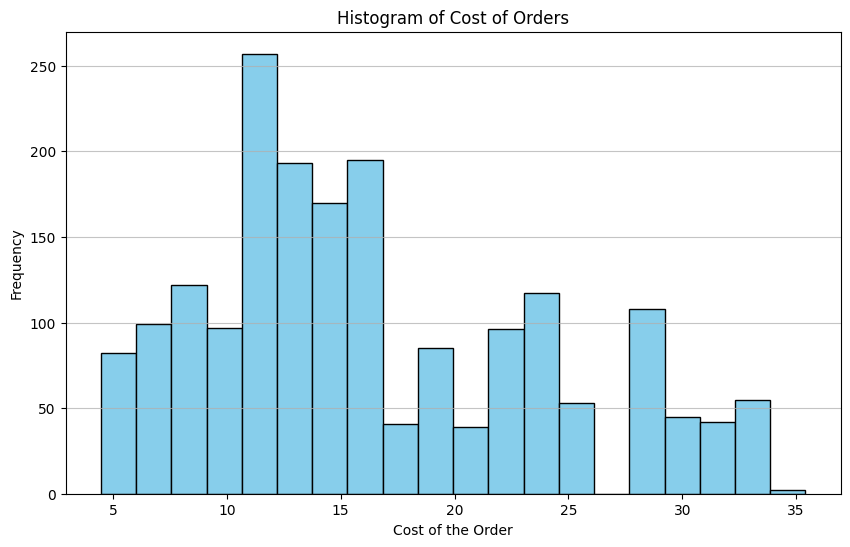

In [ ]:
# Write the code here
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['cost_of_the_order'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Cost of the Order')
plt.ylabel('Frequency')
plt.title('Histogram of Cost of Orders')
plt.grid(axis='y', alpha=0.75)
plt.show()

Observations: We can observe based on this histogram that the large majority of orders are between 10 dolars and 18 dollars.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

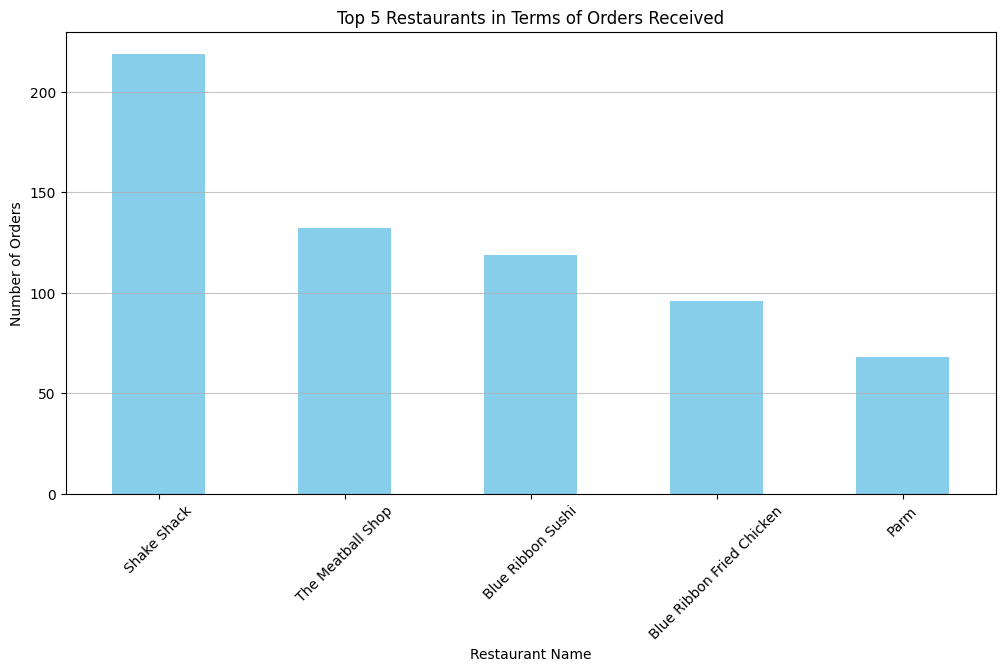

In [ ]:
# Write the code here
top_restaurants = df['restaurant_name'].value_counts().head(5)
plt.figure(figsize=(12, 6))
top_restaurants.plot(kind='bar', color='skyblue')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Orders')
plt.title('Top 5 Restaurants in Terms of Orders Received')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

#### Observations:Shake shack is the most popular restaurant to order from based on our data. The gap between them and the second place is large, much larger than the third fourth and fifth most popular restaurants.


### **Question 8**: Which is the most popular cuisine on weekends?

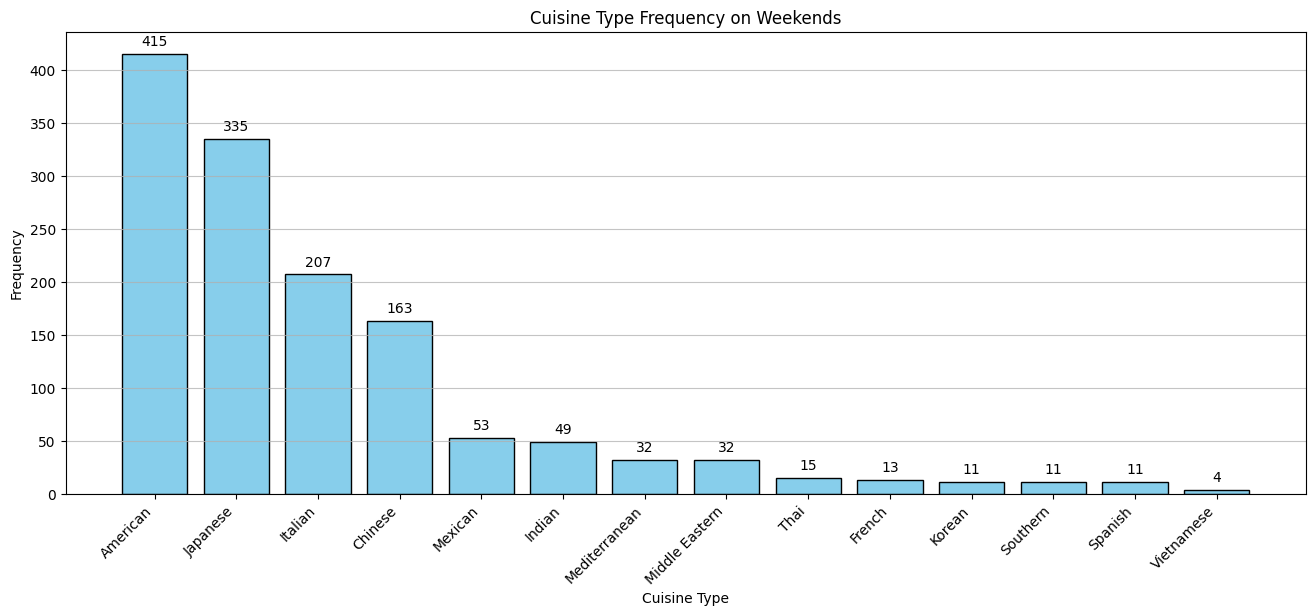

In [ ]:
# Write the code here
weekend_orders = df[df['day_of_the_week'] == 'Weekend']

cuisine_counts = weekend_orders['cuisine_type'].value_counts()

sorted_cuisines = cuisine_counts.sort_values(ascending=False).index

plt.figure(figsize=(16, 6))
bars = plt.bar(sorted_cuisines, cuisine_counts[sorted_cuisines], color='skyblue', edgecolor='black')
plt.xlabel('Cuisine Type')
plt.ylabel('Frequency')
plt.title('Cuisine Type Frequency on Weekends')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom')

plt.show()

#### Observations: American cuisine is the most popular cuisine during weekend ordering hours. This data is right skewed, with the most popular weekend cuisines being significantly more popular than those at bottom of the distribution.


### **Question 9**: What percentage of the orders cost more than 20 dollars?

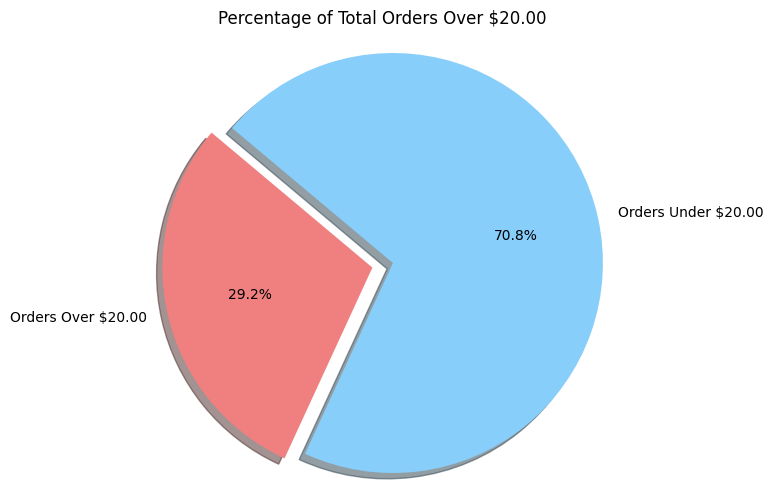

In [ ]:
# Write the code here
total_orders = len(df)

expensive_orders = df[df['cost_of_the_order'] > 20.00]

percentage_expensive_orders = len(expensive_orders) / total_orders * 100

percentage_non_expensive_orders = 100 - percentage_expensive_orders

labels = ['Orders Over $20.00', 'Orders Under $20.00']
sizes = [percentage_expensive_orders, percentage_non_expensive_orders]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

plt.title('Percentage of Total Orders Over $20.00')
plt.show()

The majority of orders are under 20.00 dollars, only 29.2 percent are over 20.00 dollars

### **Question 10**: What is the mean order delivery time?

In [ ]:
# Write the code here
mean_delivery_time = df['delivery_time'].mean()

print(f"The mean delivery time is: {mean_delivery_time} minutes")

The mean delivery time is: 24.161749209694417 minutes


#### Observations: We can observe that the mean delivery time is 24.161749209694417 minutes




### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

Customer ID: 52832, Number of Orders: 13
Customer ID: 47440, Number of Orders: 10
Customer ID: 83287, Number of Orders: 9


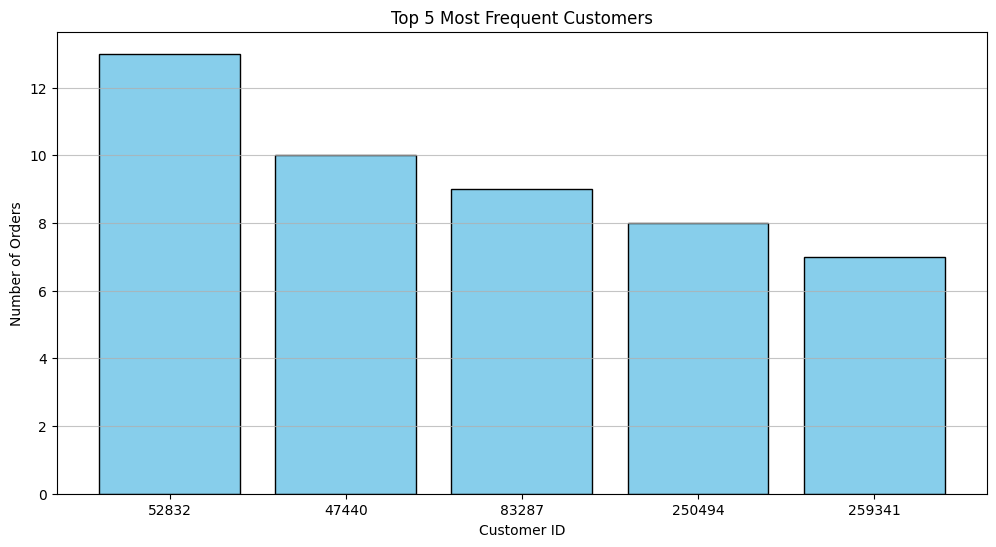

In [ ]:
# Write the code here
top_customers = df['customer_id'].value_counts().head(3)

for customer_id, orders in top_customers.items():
    print(f"Customer ID: {customer_id}, Number of Orders: {orders}")

top_5_customers = df['customer_id'].value_counts().head(5)

plt.figure(figsize=(12, 6))
plt.bar(top_5_customers.index.astype(str), top_5_customers.values, color='skyblue', edgecolor='black')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.title('Top 5 Most Frequent Customers')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.show()


#### Observations: Customer 52832 ordered the most. 52832, 47440 and 83287 will receive vouchers. The other two, 250494 and 259341 will not get a voucher.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

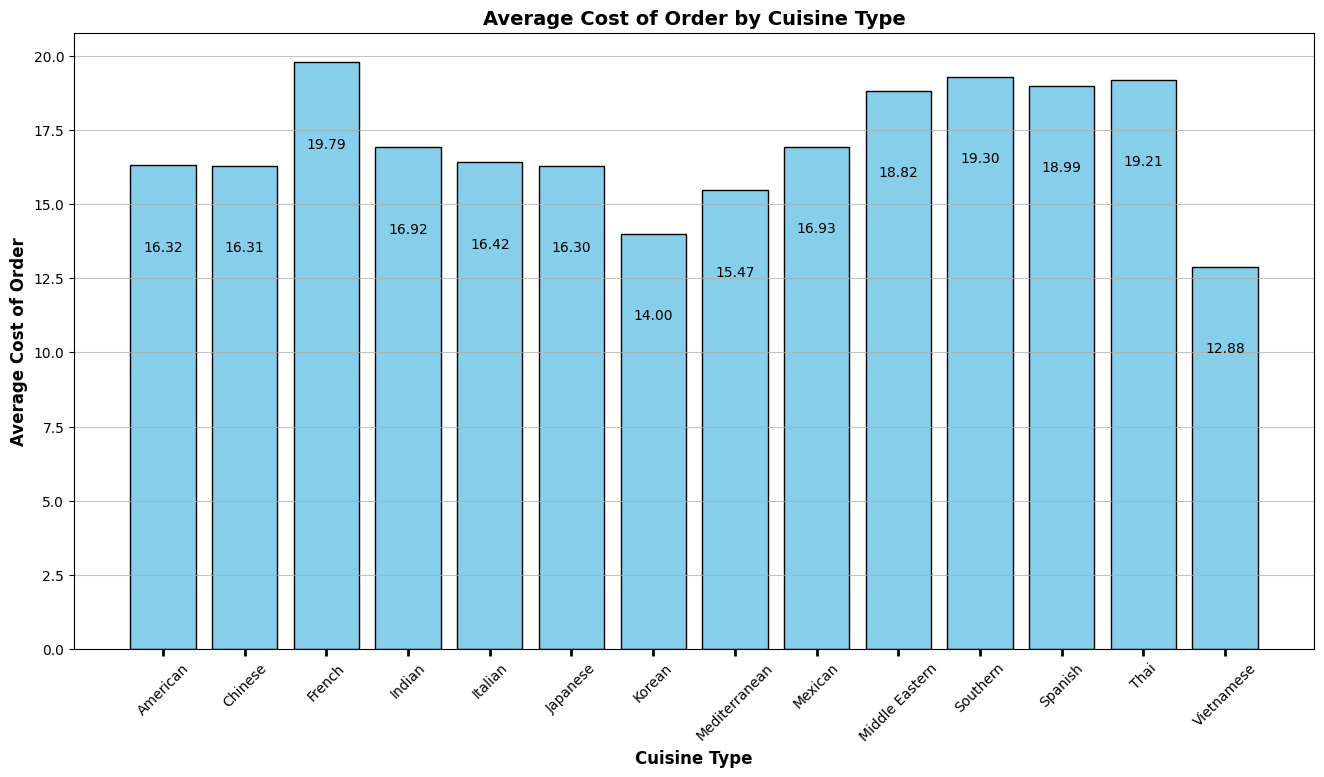

In [ ]:
# Write the code here
avg_cost_by_cuisine = df.groupby('cuisine_type')['cost_of_the_order'].mean()

plt.figure(figsize=(16, 8))
bars = plt.bar(avg_cost_by_cuisine.index, avg_cost_by_cuisine.values, color='skyblue', edgecolor='black')
plt.xlabel('Cuisine Type', fontweight='bold', fontsize=12)
plt.ylabel('Average Cost of Order', fontweight='bold', fontsize=12)
plt.title('Average Cost of Order by Cuisine Type', fontweight='bold', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)

for i, v in enumerate(avg_cost_by_cuisine.values):
    plt.text(i, v - 3, f"{v:.2f}", ha='center', va='bottom')

plt.tick_params(axis='x', bottom=True, length=5, width=2, direction='out')

plt.show()

Observations: With this bar graph we can see the average cost of orders by cuisine type. With this knowledge the company may decide to promote French, Southern, Thai and Spanish food, so their customers spend more money, and hence earn Food Hub more revenue per order placed.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
# Write the code here
rated_restaurants = df[df['rating'] != 'Not given'].copy()

rated_restaurants['rating'] = pd.to_numeric(rated_restaurants['rating'], errors='coerce')

restaurant_stats = rated_restaurants.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

promotional_restaurants = restaurant_stats[(restaurant_stats['count'] > 50) & (restaurant_stats['mean'] > 4)]

promotional_restaurants = promotional_restaurants.sort_values(by='mean', ascending=False)

print(promotional_restaurants)

                           count      mean
restaurant_name                           
The Meatball Shop             84  4.511905
Blue Ribbon Fried Chicken     64  4.328125
Shake Shack                  133  4.278195
Blue Ribbon Sushi             73  4.219178


#### Observations: The Meatball Shop is the highest scoring restaurant by a strong margin, and is also the second most frequently ordered. Blue Ribbon Fried Chicken is the least frequently ordered amongst these promotional restaurants, but scored second place in overall rating. Shake Shack was ordered by far the most out of the promotional restaurants, and was the third highest rated. Blue Ribbon Sushi has the lowest average rating of the promotional restaurants, and it is also the third most frequently ordered. Keep in mind that for this analysis I considered every order that was not rated to be not included.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

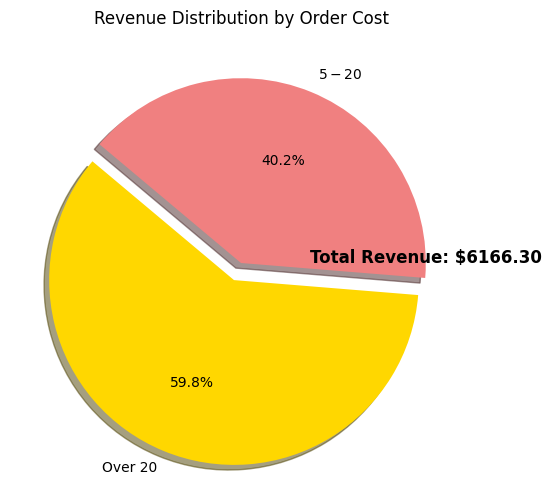

In [ ]:
#Write the code here
revenue_gt_20 = 0.25 * (df['cost_of_the_order'][(df['cost_of_the_order'] > 20)]).sum()
revenue_gt_5_lt_20 = 0.15 * (df['cost_of_the_order'][(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]).sum()

total_revenue = revenue_gt_20 + revenue_gt_5_lt_20

labels = ['Over 20', '$5-$20']
sizes = [revenue_gt_20, revenue_gt_5_lt_20]
colors = ['gold', 'lightcoral']
explode = (0.1, 0)

plt.figure(figsize=(10, 6))
patches, texts, autotexts = plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 10})

plt.text(1, 0, f"Total Revenue: ${total_revenue:.2f}", fontsize=12, ha='center', fontweight='bold')

plt.title('Revenue Distribution by Order Cost')
plt.show()

#### Observations: Here we can tell by looking at this pie chart that the total revenue generated by Food Hub is 6,166.30 dollars. 59.8 percent of this revenue comes from orders exceeding 20 dollars, while the remaining 40.2 percent comes from orders between 5 and 20 dollars.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

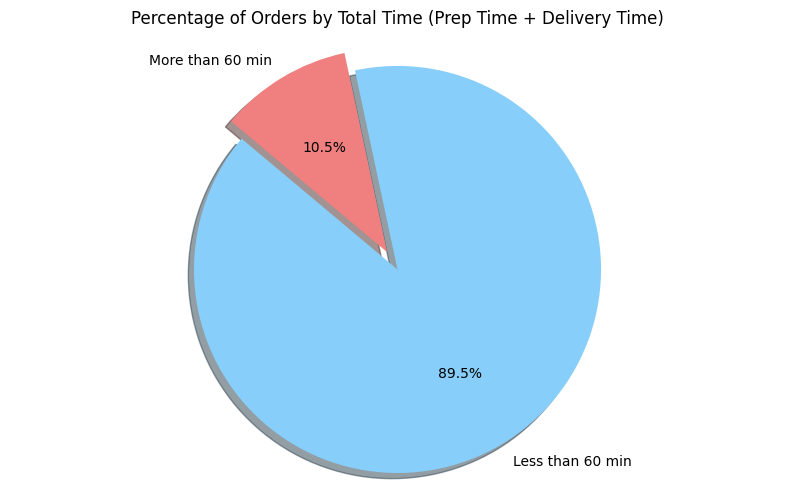

In [ ]:
# Write the code here
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

percentage_gt_60 = (df['total_time'] > 60).mean() * 100
percentage_lt_60 = 100 - percentage_gt_60

labels = ['Less than 60 min', 'More than 60 min']
sizes = [percentage_lt_60, percentage_gt_60]
colors = ['lightskyblue', 'lightcoral']
explode = (0, 0.1)

plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

plt.title('Percentage of Orders by Total Time (Prep Time + Delivery Time)')
plt.show()

#### Observations: Based on the pie chart above we know that 89. percent of orders take less than 60 minutes to arrive to the customer after the order was placed. Only 10.5 percent of orders take over anhour to arrive to the customer after their order was placed.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

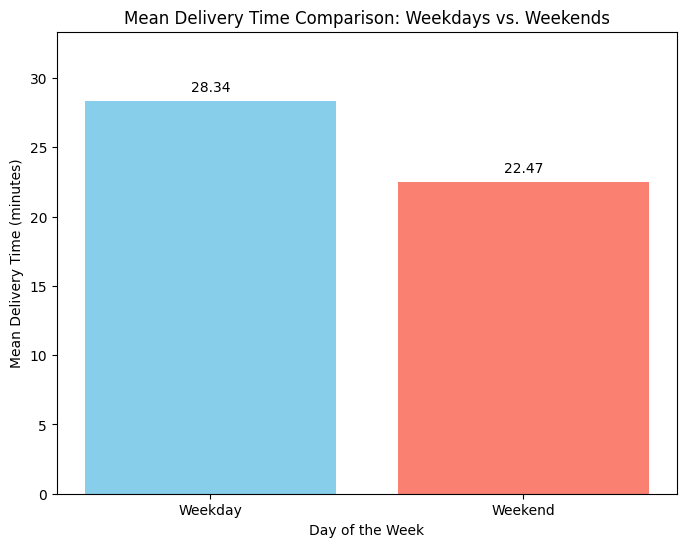

In [ ]:
# Write the code here
mean_delivery_time_weekday = df[df['day_of_the_week'] != 'Weekend']['delivery_time'].mean()
mean_delivery_time_weekend = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

plt.figure(figsize=(8, 6))
bars = plt.bar(['Weekday', 'Weekend'], [mean_delivery_time_weekday, mean_delivery_time_weekend], color=['skyblue', 'salmon'])
plt.xlabel('Day of the Week')
plt.ylabel('Mean Delivery Time (minutes)')
plt.title('Mean Delivery Time Comparison: Weekdays vs. Weekends')

for bar, mean in zip(bars, [mean_delivery_time_weekday, mean_delivery_time_weekend]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{mean:.2f}', ha='center', va='bottom')

plt.ylim(0, max(mean_delivery_time_weekday, mean_delivery_time_weekend) + 5)
plt.show()

#### Observations: Based on the bar chart generated above we can tell that orders are delivered on average roughly 6 minutes more quickly on weekends. This could be due to a number of factors, such as traffic conditions being lighter on the weekend, or there being more restaurant staff available on the weekend, leading to faster delivery time.


### Conclusion and Recommendations

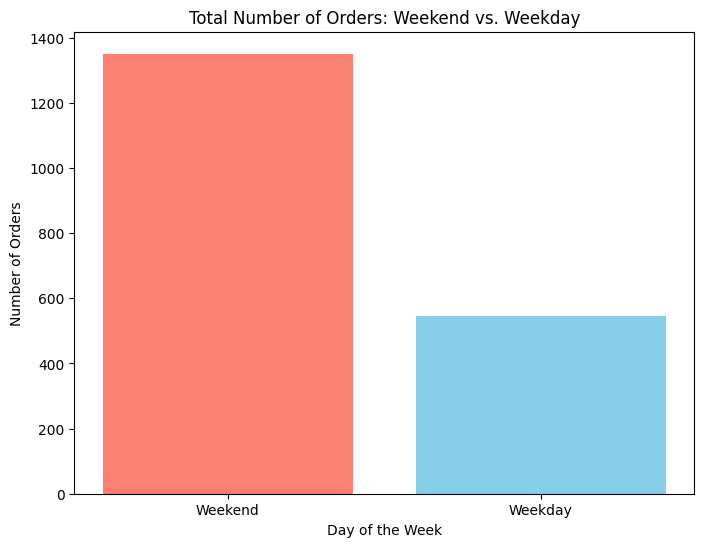

In [ ]:
#Code here shows total number of weekend vs week day orders
weekend_orders_count = df[df['day_of_the_week'] == 'Weekend'].shape[0]
weekday_orders_count = df[df['day_of_the_week'] != 'Weekend'].shape[0]

plt.figure(figsize=(8, 6))
plt.bar(['Weekend', 'Weekday'], [weekend_orders_count, weekday_orders_count], color=['salmon', 'skyblue'])
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.title('Total Number of Orders: Weekend vs. Weekday')
plt.show()

Observations: Here we see there are far more weekend orders than weekday.

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  The large majority of orders are between 10 dolars and 18 dollars.
*  Shake shack is the most popular restaurant to order from based on our data. Meatball Shop is the next most popular followed by Blue Ribbon Sushi and Fried Chicken.
* The most popular cuisines on the weekends, when most orders are placed, are American, Japanese and Italian.
* The majority of Food Hubs revenue comes from orders over 20 dollars, except only 29.2 percent of their orders are actually orders that exceed 20 dolalrs, meaning a majority of their revenue comes from a minority of their orders.
* We see their total revenue is 6166.30 dollars.
* A promising statistic we can see about Food Hub is that 89.5 percent of orders arrive to the customer within one hour after ordering their food, meaning nearly 90 percent of orders are prepared, as well as delivered within that one hour time frame.
* We can also see that there is many more orders placed on weekends than on weekdays.


### Recommendations:

*  Since the majority of Food Hub's orders are within 10 to 18 dollars, I would reccomend offering promotions and discounts for orders that exceed that range, so that customers are encouraged to spend more money, driving larger revenue for Food Hub.
* Since Shake Shack is the most popular restaurant for Food Hub, I would reccomend partnering with them to create more exclusive, or personalized offers in order to attract more customers. This would increase order volume as well as total dollars spent.
* During weekend rushes, I would reccomend that Food Hub highlight American, Japanese, and Italian cuisines in marketing campaigns in order to capitalize on how popular these cuisines are. This will increase volume of orders for these restaurants and drive revenue for Food Hub. Also, French, Southern, Spanish and Thai food are deserving of some partnership due to their high costs per order. With more customers ordering from places with this type of cuisine, Food Hub will earn more revenue. We know this because orders over 20 dollars are where Food Hub earns most of its revenue.
* Since the large majority of revenue is coming from orders over 20 dollars, we can use the plan above as well as focussing on increasing the average order value by promoting higher priced meals or items, and by offering bundle deals that cost over 20 dollars.
* To retain customer satisfaction and loyalty it is important to continue to ensure timely deliveries under an hour. Since more orders are placed on the weekend, it is important to ensure appropriate staffing levels and necessary resources are in place to accomodate the higher order voulme.

---

In [ ]:
!pip install nbconvert

In [ ]:
from nbconvert import HTMLExporter
import nbformat

with open('/content/drive/MyDrive/Data Science Course/Food Hub/Food Hub Project - Robert Bizier.ipynb') as f:
    nb = nbformat.read(f, as_version=4)
    html_exporter = HTMLExporter()
    html_body, _ = html_exporter.from_notebook_node(nb)
    with open('output.html', 'w') as html_file:
        html_file.write(html_body)

In [ ]:
from google.colab import files
files.download('output.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>